# Titanic: Machine Learning from Disaster
### Predict survival on the Titanic
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Conclusion

## 1. Defining the problem statement
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “which people are more likely to survive” using passenger data (ie name, age, gender, socio-economic class, etc).

## 2. Collecting the data

training data set and testing data set are given by you can download from kaggle directly [kaggle](https://www.kaggle.com/c/titanic/data)  

Let's import the necesssary header files needed for this problem


In [59]:
import seaborn as sns
import numpy as np
import pandas as pd

pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

print('Successfully imported libraries')

Successfully imported libraries


## 3. Exploratory Data Analysis

In [60]:
train_df = pd.read_csv('train.csv')
#test_df = pd.read_csv('processed_test.csv')
print('Successfully loaded data')

Successfully loaded data


Once you are done processing the test data you can uncomment the line, as test data processing is not done in this notebook.

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard Titanic  	
- parch:	# of parents / children aboard Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

In [62]:
train_df.shape

(891, 12)

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.

In [63]:
display(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [64]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
total = train_df.isnull().sum().sort_values()
percent = total / train_df.isnull().count().sort_values()
pd.concat([total,percent],axis = 1,keys = ['Count','%'])

,Count,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Embarked,2,0.002245


We can see that *Age* value is missing for many rows. 

Out of 891 rows, the *Age* value is present only in 714 rows.

Similarly, *Cabin* values are also missing in many rows. Only 204 out of 891 rows have *Cabin* values.

In [66]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 3.1 Univariate Data Analysis

###  - Bar Chart for Categorical Features
- Sex
- Pclass
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

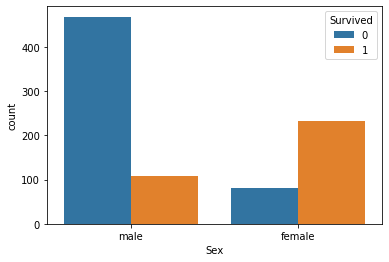

In [67]:
sns.countplot(x = 'Sex',data = train_df,hue = 'Survived')
plt.show()

The Chart confirms **Women** more likely survivied than **Men**

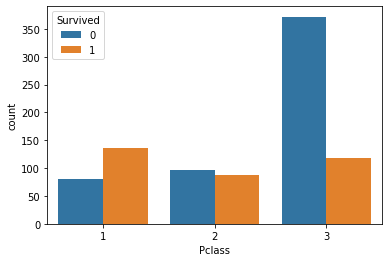

In [68]:
sns.countplot(x = 'Pclass',data = train_df,hue = 'Survived')
plt.show()

The Chart confirms **1st class** more likely survivied than **other classes**  
The Chart confirms **3rd class** more likely dead than **other classes**

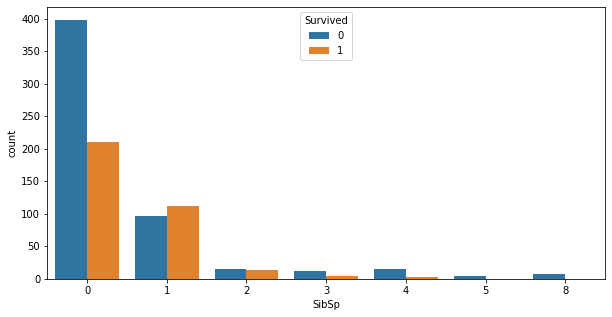

In [69]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'SibSp',data = train_df,hue = 'Survived')
plt.show()

The Chart confirms that **a person aboarded without siblings or spouse** is more likely dead

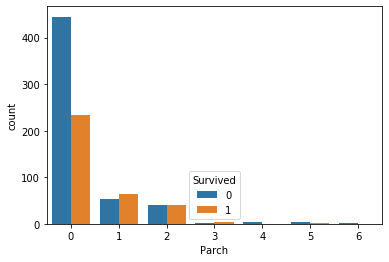

In [70]:
sns.countplot(x = 'Parch',data = train_df,hue = 'Survived')
plt.show()

  
The Chart confirms that **a person aboarded alone** is more likely dead

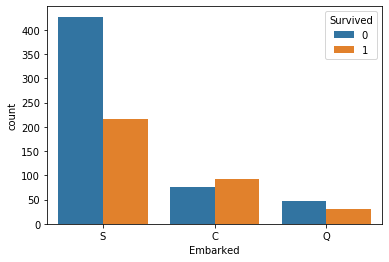

In [71]:
sns.countplot(x = 'Embarked',data = train_df,hue = 'Survived')
plt.show()

The Chart confirms that **a person aboarded from C** is slightly more likely survived  
The Chart confirms that **a person aboarded from Q** is more likely dead  
The Chart confirms that **a person aboarded from S** is more likely dead

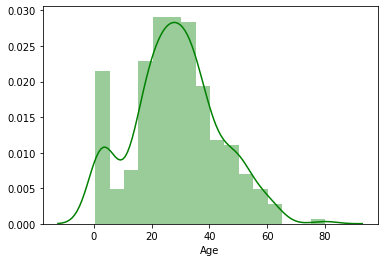

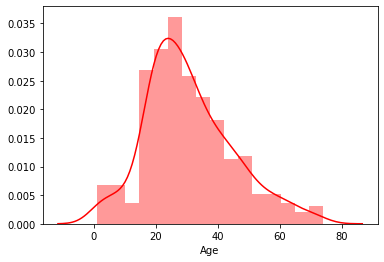

In [72]:
x = train_df[train_df['Survived'] == 1]
y = train_df[train_df['Survived'] == 0]
sns.distplot(x['Age'],color = 'green')
plt.show()
sns.distplot(y['Age'],color = 'red')
plt.show()


**Younger** persons are more likely to survive and **elder** persons are more likely to die

## 3.2 Bivariate Analysis

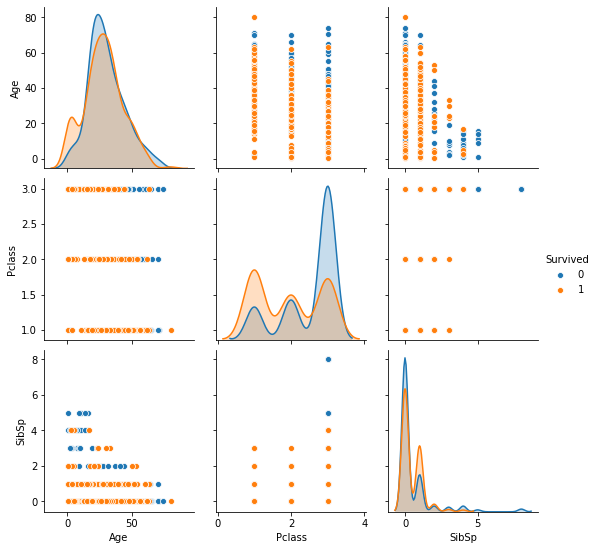

In [73]:
sns.pairplot(data = train_df, hue = 'Survived', vars = ['Age','Pclass','SibSp'])

People having **more siblings** and also belong to **3rd class,** have good chances of survival


## 3.3 Studying Correlation using correlation matrix

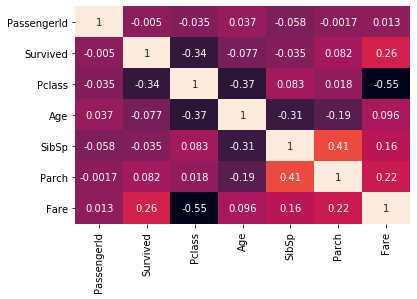

In [74]:
cor = train_df.corr()
sns.heatmap(cor, cbar = False, annot = True)

### Conclusions
- Age has a **negative** correlation with **Pclass** 
- Age has a <b>negative</b> correlation with <b>SibSp</b> and <b>Parch</b>

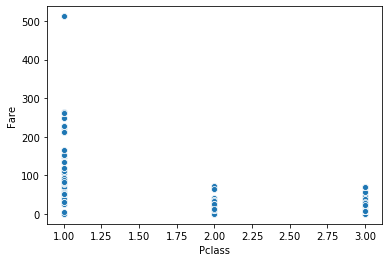

In [75]:
sns.scatterplot(x = 'Pclass', y = 'Fare', data = train_df )

**Pclass 1** corresponds to **higher** fares while **Pclass 2 and 3** coressponds to **lower** fares

## 4. Feature Engineering

### Extracting the passenger titles

If you closely look at the name of the passengers: 

- Braund, <b> Mr.</b> Owen Harris	
- Heikkinen, <b>Miss.</b> Laina
- Oliva y Ocana, <b>Dona.</b> Fermina
- Peter, <b>Master.</b> Michael J

You will notice that each name has a title in it.  This can be a simple Miss. or Mrs. but it can be sometimes something more sophisticated like Master, Sir or Dona. In that case, we might introduce an additional information about the social status by simply parsing the name and extracting the title and converting to a binary variable.

In [76]:
titles = set()
for name in train_df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)    

{'Miss', 'Mrs', 'Rev', 'Major', 'Lady', 'Sir', 'Mr', 'Mme', 'Jonkheer', 'Dr', 'the Countess', 'Mlle', 'Capt', 'Col', 'Ms', 'Master', 'Don'}


In [77]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
 
def get_titles(train_df):
    train_df['Title'] = train_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    train_df['Title'] = train_df.Title.map(Title_Dictionary)
    return train_df

This function parses the names and extract the titles. Then, it maps the titles to categories of titles. 
We selected : 

- Officer
- Royalty 
- Mr
- Mrs
- Miss
- Master

In [78]:
train_df = get_titles(train_df)


In [79]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Let's check if the titles have been filled correctly.

In [80]:
train_df[train_df['Title'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


### Processing the ages

We have seen in the first part that the Age variable was missing 177 values. This is a large number ( ~ 13% of the dataset). Simply replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers. 

Let's group our dataset by sex, Title and passenger class and visualize the relationships between them.



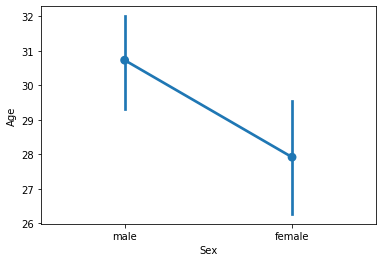

In [81]:
sns.pointplot(x = 'Sex', y = 'Age', data = train_df)

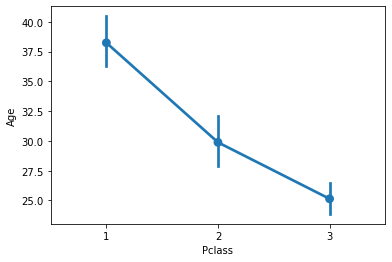

In [82]:
sns.pointplot(x = 'Pclass', y = 'Age', data = train_df)

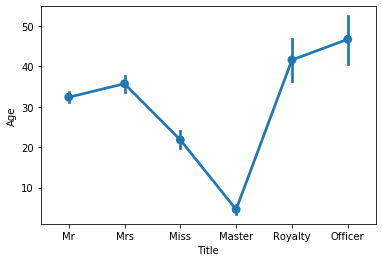

In [83]:
sns.pointplot(x = 'Title', y = 'Age', data = train_df)

let us find the median by groupping Pclass,title and sex

In [84]:
x = train_df.groupby(['Pclass','Title','Sex']).median()
grouped_median_train = x['Age'].reset_index()
grouped_median_train

,Pclass,Title,Sex,Age
0,1,Master,male,4.0
1,1,Miss,female,30.0
2,1,Mr,male,40.0
3,1,Mrs,female,40.0
4,1,Officer,female,49.0
5,1,Officer,male,51.0
6,1,Royalty,female,40.5
7,1,Royalty,male,40.0
8,2,Master,male,1.0
9,2,Miss,female,24.0


This dataframe will help us impute missing age values based on different criteria.

For example: 

- If the passenger is female, from Pclass 1, and from royalty the median age is 40.5.
- If the passenger is male, from Pclass 3, with a Mr title, the median age is 26.

The function defined below will complete imputing of age

In [85]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global train_df
    train_df['Age'] = train_df.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return train_df

In [86]:
train_df = process_age()

In [87]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


### Processing Cabin

In [88]:
 def process_cabin():
    global train_df    
    train_df.Cabin.fillna('U', inplace=True)
    train_df['Cabin'] = train_df['Cabin'].map(lambda c: c[0])
    cabin_dummies = pd.get_dummies(train_df['Cabin'], prefix='Cabin')    
    train_df = pd.concat([train_df, cabin_dummies], axis=1)
    train_df.drop('Cabin', axis=1, inplace=True)
    return train_df

In [89]:
train_df = process_cabin()


In [90]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,0,0,0,0,0,0,0,1


### Processing Family

This part includes creating new variables based on the size of the family (the size is a new feature we develop from the existing features).

This creation of new variables is done under a assumption that large families are grouped together, hence they are more likely to get rescued than people traveling alone.

In [91]:
train_df['Family Size'] = train_df['Parch'] + train_df['SibSp'] + 1
train_df['Alone'] = train_df['Family Size'].map(lambda c : 1 if c==1 else 0 )
train_df['Not_Alone'] = train_df['Family Size'].map(lambda c : 1 if c > 1 else 0 ) 


In [92]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Family Size,Alone,Not_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S,Mr,0,0,0,0,0,0,0,0,1,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C,Mrs,0,0,1,0,0,0,0,0,0,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S,Miss,0,0,0,0,0,0,0,0,1,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S,Mrs,0,0,1,0,0,0,0,0,0,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S,Mr,0,0,0,0,0,0,0,0,1,1,1,0
5,6,0,3,"Moran, Mr. James",male,26.00,0,0,330877,8.4583,Q,Mr,0,0,0,0,0,0,0,0,1,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,S,Mr,0,0,0,0,1,0,0,0,0,1,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S,Master,0,0,0,0,0,0,0,0,1,5,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,S,Mrs,0,0,0,0,0,0,0,0,1,3,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,C,Mrs,0,0,0,0,0,0,0,0,1,2,0,1


### Binning Age
Now we need to convert the **age** feature. First we will convert it from float into integer. Then we will create the new **Age** variable, by categorizing every age into a group. Note that it is important on how you form these groups, since you don’t want, for example, that 80% of your data falls into group 1.

In [93]:
data = [train_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

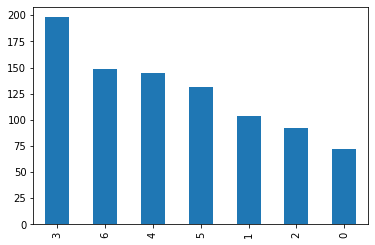

In [94]:
train_df['Age'].value_counts().plot(kind = 'bar')

### Processing Fare

let's change the dataype of fare into integer and apply binning here also

In [95]:
train_df['Fare'].astype(int)
data = [train_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[ dataset['Fare'] == 6, 'Fare'] = 0
    dataset.loc[ dataset['Fare'] == 7, 'Fare'] = 0
    dataset.loc[ dataset['Fare'] == 5, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 10), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 20), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 30), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 70), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 70), 'Fare'] = 5
    

Let's visualize the above results

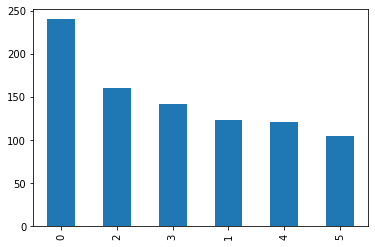

In [96]:
train_df['Fare'].value_counts().plot(kind = 'bar')

Dropping the ticket column since it is not used

In [97]:
train_df.drop(['Ticket'], axis = 1, inplace = True)

**Embarked** has **two** missing values. Let's fill those with modal value which is **Southampton (S)**

In [98]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

### Encoding categorical variables

In [99]:
x = pd.get_dummies(train_df['Sex'],drop_first = True)
train_df = pd.concat([train_df,x],axis = 1)
train_df = pd.concat([train_df, pd.get_dummies(train_df['Title'], prefix = 'Title')],axis = 1)
train_df = pd.concat([train_df, pd.get_dummies(train_df['Embarked'], prefix = 'Embarked')],axis = 1)

In [100]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Family Size,Alone,Not_Alone,male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,0,S,Mr,0,0,0,0,0,0,0,0,1,2,0,1,1,0,0,1,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,5,C,Mrs,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,0,S,Miss,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,4,S,Mrs,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,1,S,Mr,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1


###  Dropping useless features

In [101]:
train_df.drop(['Embarked_C', 'Title_Royalty', 'Cabin_T'], axis = 1, inplace = True)
train_df.drop(['Sex'], axis = 1,inplace = True)
train_df.drop(['Name'], axis =1, inplace = True)
train_df.drop(['PassengerId'], axis =1, inplace = True)
train_df.drop(['Embarked'], axis =1, inplace = True)
train_df.drop(['Title'], axis =1, inplace = True)

In [102]:
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Family Size,Alone,Not_Alone,male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Embarked_Q,Embarked_S
0,0,3,2,1,0,0,0,0,0,0,0,0,0,1,2,0,1,1,0,0,1,0,0,0,1
1,1,1,5,1,0,5,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0
2,1,3,3,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1
3,1,1,5,1,0,4,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,1
4,0,3,5,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,1
5,0,3,3,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0
6,0,1,6,0,0,4,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1
7,0,3,0,3,1,3,0,0,0,0,0,0,0,1,5,0,1,1,1,0,0,0,0,0,1
8,1,3,3,0,2,2,0,0,0,0,0,0,0,1,3,0,1,0,0,0,0,1,0,0,1
9,1,2,1,1,0,3,0,0,0,0,0,0,0,1,2,0,1,0,0,0,0,1,0,0,0


In [58]:
train_df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_U', 'Family Size', 'Alone', 'Not_Alone', 'male', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

## 5. Feature Selection

We've come up to more than 20 features so far. This number is quite large.

When feature engineering is done, we usually tend to decrease the dimensionality by selecting the "right" features that capture the essential.

In fact, feature selection comes with many benefits:

**1.** It decreases redundancy among the data
**2.** It speeds up the training process
**3.** It reduces overfitting

Tree-based estimators can be used to compute feature importance, which in turn can be used to estimate the relavance of the features.

In [56]:
X_train = train_df.iloc[:,1:26]
Y_train = train_df.iloc[:,0]

In [57]:
classifier  = RandomForestClassifier()
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Let's have a look at the importance of each feature.

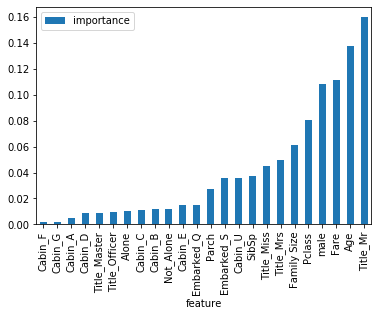

In [58]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = classifier.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind = 'bar')


As you may notice, there is a great importance linked to Title_Mr, Age, Fare, and Sex(male).

Let's now transform our training-set and test-set in a more compact dataset.

In [59]:
model = SelectFromModel(classifier, prefit=True,threshold = .011)
train_reduced = model.transform(X_train)
print(train_reduced.shape)

(891, 17)


In [60]:
test_reduced = model.transform(test_df)

## 6. Modelling

### K-Fold Cross Validation

In [69]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scores = []
model_name = []

###  Logistic Regression

In [70]:
sc = StandardScaler()
t = sc.fit_transform(train_reduced)
classifier = LogisticRegression()
score = cross_val_score(classifier, t, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy')
print(np.mean(score)*100)
scores.append(np.mean(score))
model_name.append("Logistic Regression")

82.04244694132335


###  KNN

In [71]:
classifier = KNeighborsClassifier(n_neighbors = 10)
scoring = 'accuracy'
score = cross_val_score(classifier, train_reduced, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("KNN")

81.36953807740325


###  Decision tree 

In [72]:
classifier = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(classifier, train_reduced, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("Decision tree")

79.46192259675405


###  Naive Bayees

In [73]:
classifier = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(classifier, train_reduced, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("Naive Bayees")

79.45318352059925


### Support Vector Machines 

In [74]:
classifier = SVC()
scoring = 'accuracy'
score = cross_val_score(classifier, train_reduced, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("SVM")

82.93757802746568


###  Random Forest Classifier

In [75]:
classifier = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(classifier, train_reduced, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("Random Forest")

80.69538077403244


In [76]:
s = pd.DataFrame({'Model' : model_name,
              "Score" : scores  
              })
s

,Model,Score
0,Logistic Regression,0.820424
1,KNN,0.813695
2,Decision tree,0.794619
3,Naive Bayees,0.794532
4,SVM,0.829376
5,Random Forest,0.806954


### Prediction and generating csv

In [244]:
classifier = SVC() #Logistic Regression gave me a score of .78894 while svm gave me a score of .78947 on kaggle 
classifier.fit(train_reduced, Y_train)
prediction = classifier.predict(test_reduced)
passenger = np.array(list(range(891, 891 + 418)))
submission = pd.DataFrame({
    "PassengerId" : passenger,
    "Survived" : prediction
})
submission.to_csv('Submission.csv', index = False)
print("CSV generated successfully")

CSV generated successfully


## 7. Conclusion

###### In this article, we explored a dataset hosted by <a href="http://kaggle.com">Kaggle</a>.

We went through the following 
  - Defined the problem statement
  - Loaded the data
  - Exploratory Data Analysis
  - Feature Engineering  
  - Feature Selection
  - Modelling

I suggest you guys to repeat the same procedure for test set.

There is definitely a room for improvement and furture works include:

- Extracting more features by deeply analysing the data 
- Trying hyperparamter tuning for various models

I would be  happy if you could find out a way to improve this solution. We can colaborate together to improve the work, and proper credition will be given. Any suggestion would help, fell free to comment on the the model. 